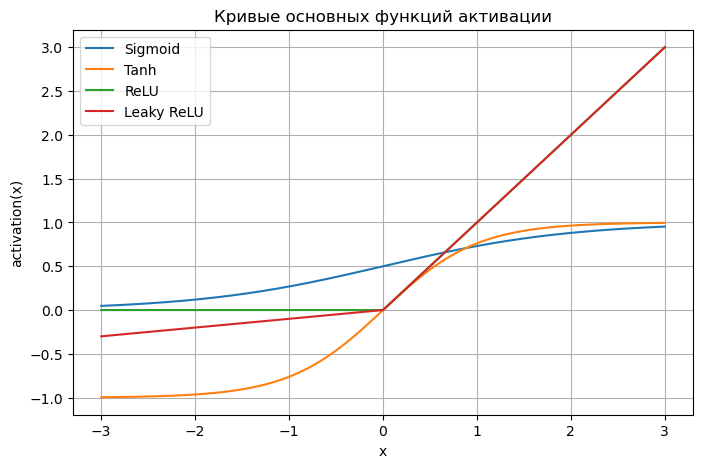

In [1]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt

from func_activation import (
    relu,
    sigmoid,
    tanh,
    leaky_relu
)
# 1) Входные данные
x = np.linspace(-3, 3, 300)


# 3) Вычисление значений
y_sig = sigmoid(x)
y_tanh = tanh(x)
y_relu = relu(x)
y_leaky = leaky_relu(x, 0.1)

# 4) Визуализация (оставьте без изменений)
plt.figure(figsize=(8, 5))
plt.plot(x, y_sig, label='Sigmoid')
plt.plot(x, y_tanh, label='Tanh')
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_leaky, label='Leaky ReLU')
plt.title('Кривые основных функций активации')
plt.xlabel('x')
plt.ylabel('activation(x)')
plt.legend()
plt.grid(True)
plt.show()

sigmoid


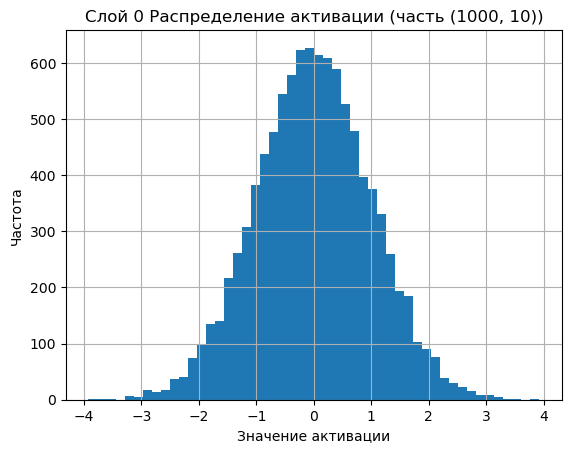

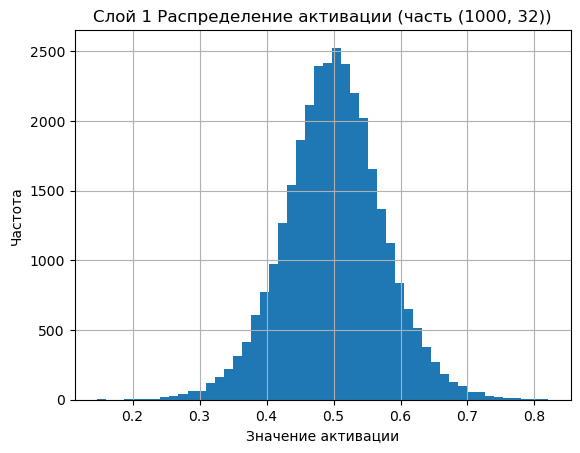

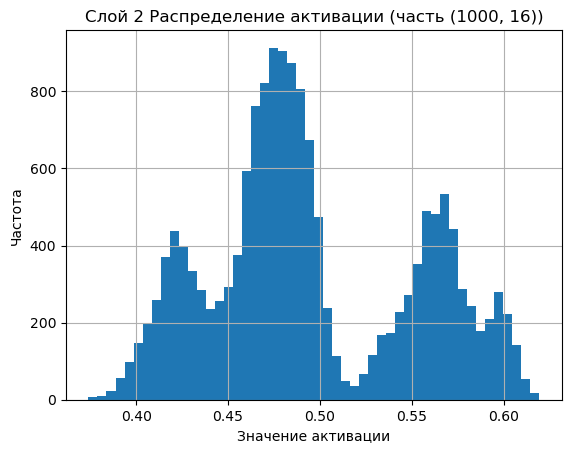

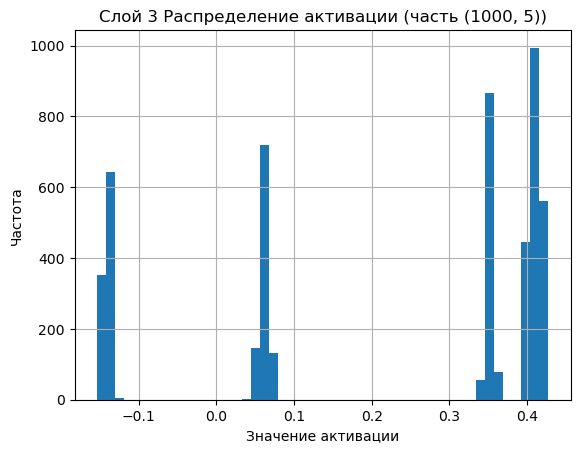

In [2]:
from basic_MLP import MLP

# Инициализируем модель с 4 слоями: 10 входов, 32 нейрон, 16 нейронов и 5 выходов
np.random.seed(42)
model = MLP([10, 32, 16, 5], activation='sigmoid')
X_rand = np.random.randn(1000, 10)

# Соберем активации
acts = model.forward_with_activations(X_rand)
print(model.activation)
# Отобразим активации каждого слоя
for idx, A in enumerate(acts):
    plt.figure()
    plt.hist(A.flatten(), bins=50)
    plt.title(f'Слой {idx} Распределение активации (часть {A.shape})')
    plt.xlabel('Значение активации')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

In [3]:
x = np.array([[1.0, 2.0, -1.0]])
# Запустим три MLP модели с архитектурой 3-2-1 и различными активациями в цикле
for act in ['relu', 'sigmoid', 'tanh']:
    np.random.seed(0)
    model_x = MLP([3,2,1], activation=act)
    y_pred = model_x.forward(x)
    print(f"{act}: y_pred={y_pred.ravel()[0]:.4f}, "
          f"len(Z_list)={len(model_x.Z_list)}, len(A_list)={len(model_x.A_list)}")

    # Отобразим значения Z и A
    for i, (Z, A) in enumerate(zip(model_x.Z_list, model_x.A_list)):
        print(f"Layer {i}: Z={Z.ravel()}, A={A.ravel()}")
    print()


relu: y_pred=0.0087, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.008746], A=[0.18539703 0.58592215]

sigmoid: y_pred=0.0422, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.04217181], A=[0.54621695 0.64242895]

tanh: y_pred=0.0094, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.00943941], A=[0.18330168 0.52695644]



Создадим набор данных, который попробуем аппроксимировать с помощью нейросети MLP

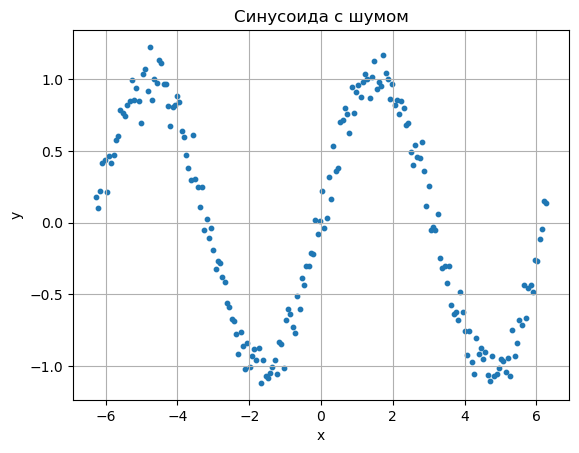

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Any, Union, Sequence
from numpy.typing import NDArray

from metrics import mse

np.random.seed(0)
X: NDArray[np.float64] = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]  # (200,1)
y: NDArray[np.float64] = np.sin(X) + 0.1*np.random.randn(*X.shape)     # шумные данные

plt.scatter(X, y, s=10)
plt.title("Синусоида с шумом")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.show()

Epoch  50, loss=0.4549
Epoch 100, loss=0.4532
Epoch 150, loss=0.4518
Epoch 200, loss=0.4387
Epoch 250, loss=0.2761
Epoch 300, loss=0.1561


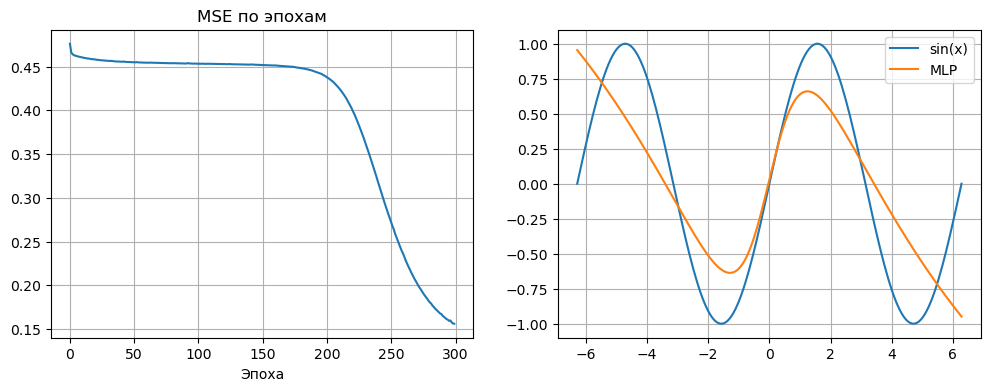

In [5]:
lr: np.float64 = np.float64(0.01)
epochs: int = 300
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []

model = MLP([1, 30, 1], activation='tanh')

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % 50 == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Попробуем обучить модель с другими параметрами для решения той же задачи:

Epoch 200, loss=0.4454
Epoch 400, loss=0.1040
Epoch 600, loss=0.0798
Epoch 800, loss=0.0658
Epoch 1000, loss=0.0777
Epoch 1200, loss=0.0510
Epoch 1400, loss=0.0453
Epoch 1600, loss=0.0407
Epoch 1800, loss=0.0557
Epoch 2000, loss=0.0173


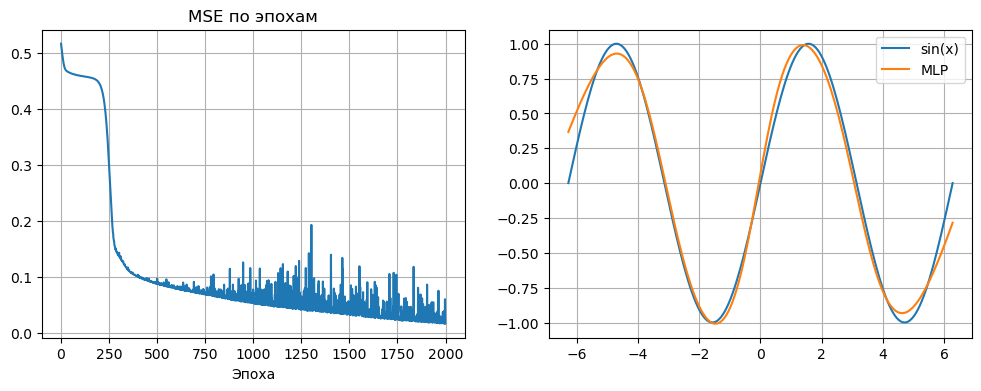

In [6]:
layer_sizes: Sequence[int] = [1, 30, 25, 10, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 2000
epoch_output: int = 200
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'tanh'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Сейчас, с непривычки, прямо мурашки от обучения. Итак - 8 секунд на моем слабом компьютере, как мы видим loss практически отсутствует, однако аппроксимация не такая близкая, но очень привлекательная, учитывая, что мы используем по сути линейный расчет, возможно, функция tanh не так хорошо двигает ситуацию. Построим обучение и графики для каждого обучения для нескольких функций активации и оценим результат.

Для начала взглянем на исходные данные и кривую аппроксимации

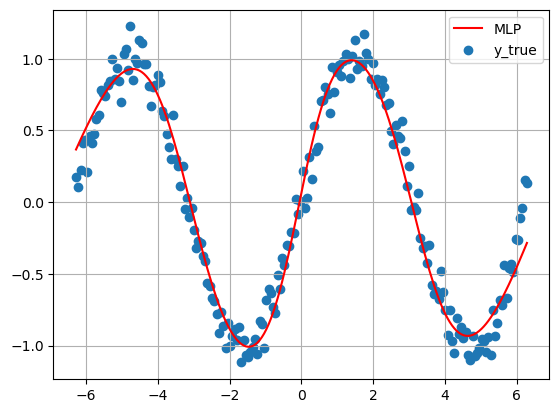

In [7]:
plt.plot(xx, model.forward(xx), label="MLP", c='r')
plt.scatter(xx, y, label='y_true')
plt.legend(); plt.grid()
plt.show()

Посмотрим на поведение для сигмоиды, как функции активации

Epoch 200, loss=0.5289
Epoch 400, loss=0.5284
Epoch 600, loss=0.5271
Epoch 800, loss=0.5245
Epoch 1000, loss=0.5182
Epoch 1200, loss=0.5003
Epoch 1400, loss=0.4723
Epoch 1600, loss=0.4643
Epoch 1800, loss=0.4615
Epoch 2000, loss=0.4597


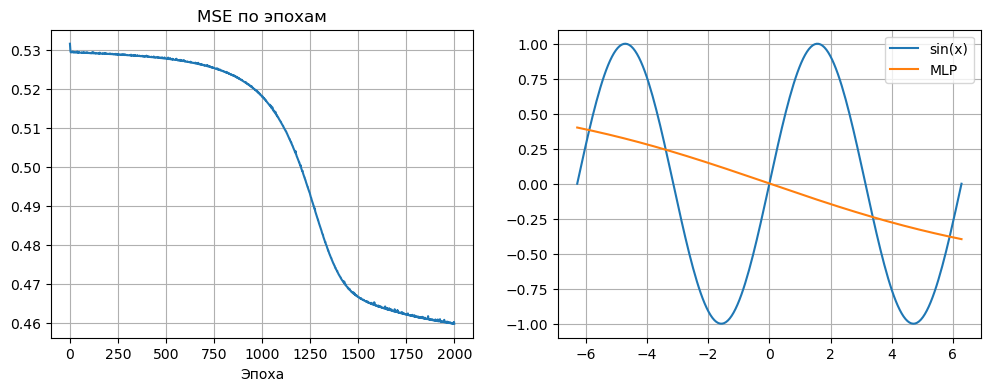

In [8]:
layer_sizes: Sequence[int] = [1, 30, 25, 10, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 2000
epoch_output: int = 200
batch_size: int = 30
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'sigmoid'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Сигмодиа совсем не справилась, или я что-то не то делаю.
Попробую новую функцию активации - синусоиду. Да-да, хитро, но все-же

Epoch 200, loss=0.0095
Epoch 400, loss=0.0095
Epoch 600, loss=0.0095
Epoch 800, loss=0.0095
Epoch 1000, loss=0.0095


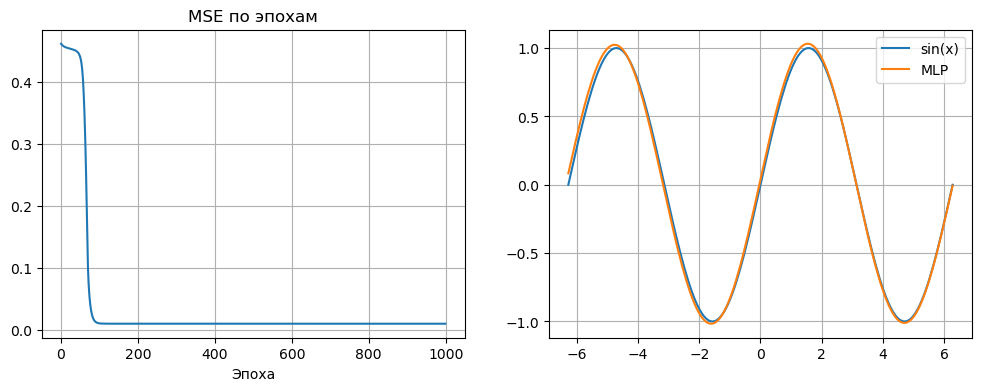

In [10]:
layer_sizes: Sequence[int] = [1, 20, 1]
lr: np.float64 = np.float64(0.01)
epochs: int = 1000
epoch_output: int = 200
batch_size: int = 20
loss_history: List[Union[np.floating[Any], np.complexfloating[Any, Any]]] = []
activation: str = 'sin'

model = MLP(layer_sizes=layer_sizes, activation=activation)

for epoch in range(1, epochs+1):
    # Перетасовываем, для избежания быстрого переобучения
    perm: NDArray[np.long] = np.random.permutation(len(X))
    # Выделяем только те части, которые попали от permutation
    X_sh, y_sh = X[perm], y[perm]
    # mini-batch learning:
    for start in range(0, len(X), batch_size):
        xb: NDArray[np.float64] = X_sh[start : start + batch_size]
        yb: NDArray[np.float64] = y_sh[start : start + batch_size]
        # Прямой проход
        preds: NDArray[np.float64] = model.forward(xb)
        # Обратный проход
        model.backward(yb)
        # Обновление параметров
        model.update_params(lr)
    # Прямой проход на всех данных необходим для вычисления потерь
    full_pred: NDArray[np.float64] = model.forward(X)
    # Запомниаем текущие потери
    loss_history.append(mse(y, full_pred))
    # Будем выводить статистику обучения только каждые 50 epoch
    if epoch % epoch_output == 0:
        print(f"Epoch {epoch:3d}, loss={loss_history[-1]:.4f}")


# Визуализация
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_history); plt.title("MSE по эпохам"); plt.xlabel("Эпоха"); plt.grid(True)
plt.subplot(1,2,2)
xx = np.linspace(-2*np.pi, 2*np.pi, 200)[:, None]
plt.plot(xx, np.sin(xx), label="sin(x)")
plt.plot(xx, model.forward(xx), label="MLP")
plt.legend(); plt.grid(True)
plt.show()

Как видно по графику потерь, вполне достаточно около 200-300 эпох для обучения довольно маленькой модели с 15 нейронами в единственном скрытом слое. Итак. Да-да, понятно, что никогда не будет так, что удасться угадать функцию по которой будет распределена признаковая зависимость и лишь чуткость инженера и умение увидеть аппроксимирующую зависимость, подобрать активационную функцию ключевое в этой задаче. А для этого надо хорошо знать матан.

И да, сейчас мы решаем задачу регрессии. Для неё, мне кажется уже сформировалась универсальная функция для обучения MLP на двумерной зависимости. Надо бы в следующий раз её вывести.

In [2]:
from MLP_learner_GD import MLP_learner_GD

learner: MLP_learner_GD = MLP_learner_GD(
    model='MLP',
    X = X,
    y = y,
    activation= 'sin',
    layer_sizes=[1, 25, 1],
    epochs=1000,
    epoch_output=200
)

In [3]:
learner.learn_model()

Epoch 200, loss=0.0097
Epoch 400, loss=0.0097
Epoch 600, loss=0.0096
Epoch 800, loss=0.0095
Epoch 1000, loss=0.0096


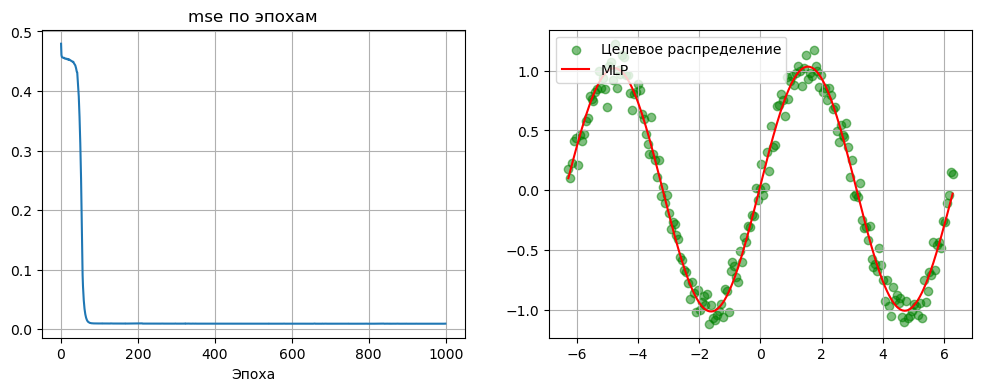

In [4]:
learner.visualise_learning_process()